In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
pd.set_option('display.max_columns', None)

In [157]:
Dataset = pd.read_excel('job_postings_excel.xlsx')
Dataset.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US,NY,NewYork",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ,Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US,IA,Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US,DC,Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI â€“ Environmental Systems Re...,"EDUCATION:Â Bachelorâ€™s or Masterâ€™s in GIS,...",Our culture is anything but corporateâ€”we hav...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US,FL,FortWorth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
Dataset.shape

(17880, 18)

In [4]:
Dataset.isna().sum() / len(Dataset)

job_id                 0.000000
title                  0.000000
location               0.019351
department             0.646141
salary_range           0.839597
company_profile        0.185011
description            0.000503
requirements           0.152852
benefits               0.404978
telecommuting          0.000000
has_company_logo       0.000000
has_questions          0.000000
employment_type        0.194128
required_experience    0.394295
required_education     0.453300
industry               0.274217
function               0.361018
fraudulent             0.000000
dtype: float64

In [5]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6327 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17871 non-null  object
 7   requirements         15147 non-null  object
 8   benefits             10639 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
UniqueDataset = Dataset.copy()

In [7]:
UniqueDataset.nunique()

job_id                 17880
title                  10914
location                2959
department              1276
salary_range             874
company_profile         1709
description            14800
requirements           11965
benefits                6203
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [8]:
UniqueDataset.drop(['salary_range', 'job_id', 'department', 'benefits'], axis = 1, inplace = True)

In [9]:
UniqueDataset.head()

,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US,NY,NewYork","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ,Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US,IA,Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US,DC,Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI â€“ Environmental Systems Re...,"EDUCATION:Â Bachelorâ€™s or Masterâ€™s in GIS,...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US,FL,FortWorth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [10]:
UniqueDataset = UniqueDataset.sort_values('title').reset_index(drop = True)


In [11]:
UniqueDataset.shape

(17880, 14)

In [12]:
UniqueDataset.head()

,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,$950/Week Truck Drivers Needed,"US,TX,Houston",We are a digital marketing agency with an emph...,Now hiring Class A truck driversAssigned Truck...,Here's who we are looking for:We are looking f...,0,1,1,Full-time,Entry level,High School or equivalent,Transportation/Trucking/Railroad,Distribution,0
1,$950/week. Truck Drivers Needed,"US,TX,Dallas",We are a digital marketing agency with an emph...,Now hiring Class A truck driversAssigned Truck...,Here's who we are looking for:We are looking f...,0,1,1,Full-time,Entry level,High School or equivalent,Transportation/Trucking/Railroad,Distribution,0
2,(Assistant) Accountant,NaN,Massive MediaÂ is the social media company beh...,"Â To support our further growth, weâ€™re looki...",NaN,0,1,1,NaN,NaN,NaN,NaN,NaN,0
3,(Internship) Communication / E-Marketing Assis...,"BE,BRU,Brussels","Founded at the beginning of 2013, the startup ...","Born in 2013,Â #URL_1126a42ca4e3346cc3e1a08fbb...",Wanna join our team? Let's see if you meet our...,0,1,1,Full-time,Internship,Unspecified,Internet,Marketing,0
4,(Internship) PR / Event Manager Assistant,"BE,BRU,Brussels","Founded at the beginning of 2013, the startup ...","Founded at the beginning of 2013, the startup ...",Desired profile: BAC+2 (minimum) with a strong...,0,1,1,Temporary,Internship,Unspecified,Internet,Public Relations,0


In [13]:
UniqueDataset.isna().sum()

title                     0
location                346
company_profile        3308
description               9
requirements           2733
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
dtype: int64

In [14]:
UniqueDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   company_profile      14572 non-null  object
 3   description          17871 non-null  object
 4   requirements         15147 non-null  object
 5   telecommuting        17880 non-null  int64 
 6   has_company_logo     17880 non-null  int64 
 7   has_questions        17880 non-null  int64 
 8   employment_type      14409 non-null  object
 9   required_experience  10830 non-null  object
 10  required_education   9775 non-null   object
 11  industry             12977 non-null  object
 12  function             11425 non-null  object
 13  fraudulent           17880 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.9+ MB


In [15]:
UniqueDataset['employment_type'] = UniqueDataset['employment_type'].bfill(axis=0)
UniqueDataset['required_experience'] = UniqueDataset['required_experience'].bfill(axis=0)
UniqueDataset['required_education'] = UniqueDataset['required_education'].bfill(axis = 0)
UniqueDataset['industry'] = UniqueDataset['industry'].bfill(axis=0)
UniqueDataset['function'] = UniqueDataset['function'].bfill(axis=0)

In [16]:
UniqueDataset.head()

,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,$950/Week Truck Drivers Needed,"US,TX,Houston",We are a digital marketing agency with an emph...,Now hiring Class A truck driversAssigned Truck...,Here's who we are looking for:We are looking f...,0,1,1,Full-time,Entry level,High School or equivalent,Transportation/Trucking/Railroad,Distribution,0
1,$950/week. Truck Drivers Needed,"US,TX,Dallas",We are a digital marketing agency with an emph...,Now hiring Class A truck driversAssigned Truck...,Here's who we are looking for:We are looking f...,0,1,1,Full-time,Entry level,High School or equivalent,Transportation/Trucking/Railroad,Distribution,0
2,(Assistant) Accountant,NaN,Massive MediaÂ is the social media company beh...,"Â To support our further growth, weâ€™re looki...",NaN,0,1,1,Full-time,Internship,Unspecified,Internet,Marketing,0
3,(Internship) Communication / E-Marketing Assis...,"BE,BRU,Brussels","Founded at the beginning of 2013, the startup ...","Born in 2013,Â #URL_1126a42ca4e3346cc3e1a08fbb...",Wanna join our team? Let's see if you meet our...,0,1,1,Full-time,Internship,Unspecified,Internet,Marketing,0
4,(Internship) PR / Event Manager Assistant,"BE,BRU,Brussels","Founded at the beginning of 2013, the startup ...","Founded at the beginning of 2013, the startup ...",Desired profile: BAC+2 (minimum) with a strong...,0,1,1,Temporary,Internship,Unspecified,Internet,Public Relations,0


In [17]:
UniqueDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   company_profile      14572 non-null  object
 3   description          17871 non-null  object
 4   requirements         15147 non-null  object
 5   telecommuting        17880 non-null  int64 
 6   has_company_logo     17880 non-null  int64 
 7   has_questions        17880 non-null  int64 
 8   employment_type      17878 non-null  object
 9   required_experience  17878 non-null  object
 10  required_education   17878 non-null  object
 11  industry             17878 non-null  object
 12  function             17878 non-null  object
 13  fraudulent           17880 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.9+ MB


In [18]:
UniqueDataset2 = UniqueDataset.copy()

In [19]:
UniqueDataset2 = UniqueDataset2[UniqueDataset2['description'].notna()]

In [20]:
UniqueDataset2.isna().sum()

title                     0
location                345
company_profile        3303
description               0
requirements           2731
telecommuting             0
has_company_logo          0
has_questions             0
employment_type           2
required_experience       2
required_education        2
industry                  2
function                  2
fraudulent                0
dtype: int64

In [21]:
UniqueDataset2 = UniqueDataset2.dropna(axis = 0, how = 'any')

In [22]:
UniqueDataset2.shape

(12467, 14)

In [23]:
UniqueDataset2 = UniqueDataset2.drop_duplicates(keep = 'first')

In [24]:
UniqueDataset2.head()

,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,$950/Week Truck Drivers Needed,"US,TX,Houston",We are a digital marketing agency with an emph...,Now hiring Class A truck driversAssigned Truck...,Here's who we are looking for:We are looking f...,0,1,1,Full-time,Entry level,High School or equivalent,Transportation/Trucking/Railroad,Distribution,0
1,$950/week. Truck Drivers Needed,"US,TX,Dallas",We are a digital marketing agency with an emph...,Now hiring Class A truck driversAssigned Truck...,Here's who we are looking for:We are looking f...,0,1,1,Full-time,Entry level,High School or equivalent,Transportation/Trucking/Railroad,Distribution,0
3,(Internship) Communication / E-Marketing Assis...,"BE,BRU,Brussels","Founded at the beginning of 2013, the startup ...","Born in 2013,Â #URL_1126a42ca4e3346cc3e1a08fbb...",Wanna join our team? Let's see if you meet our...,0,1,1,Full-time,Internship,Unspecified,Internet,Marketing,0
4,(Internship) PR / Event Manager Assistant,"BE,BRU,Brussels","Founded at the beginning of 2013, the startup ...","Founded at the beginning of 2013, the startup ...",Desired profile: BAC+2 (minimum) with a strong...,0,1,1,Temporary,Internship,Unspecified,Internet,Public Relations,0
5,(Javascript) Web Application Developer,"US,ND,Bismarck",Todaymade is a fun and growing software and we...,Todaymade is on the hunt for a web developer w...,"The Musts:You think big, and enjoy moving fast...",0,1,1,Full-time,Entry level,Unspecified,Program Development,Information Technology,0


In [25]:
UniqueDataset3 = UniqueDataset2.copy()

In [26]:
UniqueDataset3.head()

,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,$950/Week Truck Drivers Needed,"US,TX,Houston",We are a digital marketing agency with an emph...,Now hiring Class A truck driversAssigned Truck...,Here's who we are looking for:We are looking f...,0,1,1,Full-time,Entry level,High School or equivalent,Transportation/Trucking/Railroad,Distribution,0
1,$950/week. Truck Drivers Needed,"US,TX,Dallas",We are a digital marketing agency with an emph...,Now hiring Class A truck driversAssigned Truck...,Here's who we are looking for:We are looking f...,0,1,1,Full-time,Entry level,High School or equivalent,Transportation/Trucking/Railroad,Distribution,0
3,(Internship) Communication / E-Marketing Assis...,"BE,BRU,Brussels","Founded at the beginning of 2013, the startup ...","Born in 2013,Â #URL_1126a42ca4e3346cc3e1a08fbb...",Wanna join our team? Let's see if you meet our...,0,1,1,Full-time,Internship,Unspecified,Internet,Marketing,0
4,(Internship) PR / Event Manager Assistant,"BE,BRU,Brussels","Founded at the beginning of 2013, the startup ...","Founded at the beginning of 2013, the startup ...",Desired profile: BAC+2 (minimum) with a strong...,0,1,1,Temporary,Internship,Unspecified,Internet,Public Relations,0
5,(Javascript) Web Application Developer,"US,ND,Bismarck",Todaymade is a fun and growing software and we...,Todaymade is on the hunt for a web developer w...,"The Musts:You think big, and enjoy moving fast...",0,1,1,Full-time,Entry level,Unspecified,Program Development,Information Technology,0


In [27]:
UniqueDataset3.shape

(12224, 14)

In [28]:
UniqueDataset3['description'] = UniqueDataset3['description'] + ' ' + UniqueDataset3['requirements'] + ' ' + UniqueDataset3['company_profile']
UniqueDataset3.drop(['company_profile', 'requirements'], axis = 1, inplace = True)

In [29]:
UniqueDataset3.head()

,title,location,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,$950/Week Truck Drivers Needed,"US,TX,Houston",Now hiring Class A truck driversAssigned Truck...,0,1,1,Full-time,Entry level,High School or equivalent,Transportation/Trucking/Railroad,Distribution,0
1,$950/week. Truck Drivers Needed,"US,TX,Dallas",Now hiring Class A truck driversAssigned Truck...,0,1,1,Full-time,Entry level,High School or equivalent,Transportation/Trucking/Railroad,Distribution,0
3,(Internship) Communication / E-Marketing Assis...,"BE,BRU,Brussels","Born in 2013,Â #URL_1126a42ca4e3346cc3e1a08fbb...",0,1,1,Full-time,Internship,Unspecified,Internet,Marketing,0
4,(Internship) PR / Event Manager Assistant,"BE,BRU,Brussels","Founded at the beginning of 2013, the startup ...",0,1,1,Temporary,Internship,Unspecified,Internet,Public Relations,0
5,(Javascript) Web Application Developer,"US,ND,Bismarck",Todaymade is on the hunt for a web developer w...,0,1,1,Full-time,Entry level,Unspecified,Program Development,Information Technology,0


In [30]:
UniqueDataset3['country_code'] = UniqueDataset3['location'].str.split(',', expand=True)[0]

UniqueDataset3['city'] = UniqueDataset3['location'].str.split(',', expand = True)[2]

In [31]:
UniqueDataset3.head()

,title,location,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country_code,city
0,$950/Week Truck Drivers Needed,"US,TX,Houston",Now hiring Class A truck driversAssigned Truck...,0,1,1,Full-time,Entry level,High School or equivalent,Transportation/Trucking/Railroad,Distribution,0,US,Houston
1,$950/week. Truck Drivers Needed,"US,TX,Dallas",Now hiring Class A truck driversAssigned Truck...,0,1,1,Full-time,Entry level,High School or equivalent,Transportation/Trucking/Railroad,Distribution,0,US,Dallas
3,(Internship) Communication / E-Marketing Assis...,"BE,BRU,Brussels","Born in 2013,Â #URL_1126a42ca4e3346cc3e1a08fbb...",0,1,1,Full-time,Internship,Unspecified,Internet,Marketing,0,BE,Brussels
4,(Internship) PR / Event Manager Assistant,"BE,BRU,Brussels","Founded at the beginning of 2013, the startup ...",0,1,1,Temporary,Internship,Unspecified,Internet,Public Relations,0,BE,Brussels
5,(Javascript) Web Application Developer,"US,ND,Bismarck",Todaymade is on the hunt for a web developer w...,0,1,1,Full-time,Entry level,Unspecified,Program Development,Information Technology,0,US,Bismarck


In [32]:
UniqueDataset3.loc[UniqueDataset3['city'] == ' ', 'city'] = np.nan

In [33]:
UniqueDataset3.isnull().sum()

title                     0
location                  0
description               0
telecommuting             0
has_company_logo          0
has_questions             0
employment_type           0
required_experience       0
required_education        0
industry                  0
function                  0
fraudulent                0
country_code              0
city                   1809
dtype: int64

In [34]:
UniqueDataset3.dropna(inplace = True)

In [35]:
UniqueDataset3.isnull().sum()

title                  0
location               0
description            0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
country_code           0
city                   0
dtype: int64

In [36]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [37]:
UniqueDataset3.drop(['location', 'country_code'], axis = 1, inplace = True)

In [38]:
UniqueDataset3.head()

,title,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,city
0,$950/Week Truck Drivers Needed,Now hiring Class A truck driversAssigned Truck...,0,1,1,Full-time,Entry level,High School or equivalent,Transportation/Trucking/Railroad,Distribution,0,Houston
1,$950/week. Truck Drivers Needed,Now hiring Class A truck driversAssigned Truck...,0,1,1,Full-time,Entry level,High School or equivalent,Transportation/Trucking/Railroad,Distribution,0,Dallas
3,(Internship) Communication / E-Marketing Assis...,"Born in 2013,Â #URL_1126a42ca4e3346cc3e1a08fbb...",0,1,1,Full-time,Internship,Unspecified,Internet,Marketing,0,Brussels
4,(Internship) PR / Event Manager Assistant,"Founded at the beginning of 2013, the startup ...",0,1,1,Temporary,Internship,Unspecified,Internet,Public Relations,0,Brussels
5,(Javascript) Web Application Developer,Todaymade is on the hunt for a web developer w...,0,1,1,Full-time,Entry level,Unspecified,Program Development,Information Technology,0,Bismarck


In [39]:
UniqueDataset3.shape

(10415, 12)

In [40]:
conda install -c conda-forge wordcloud=1.6.0

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [41]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [42]:
import sys
print(sys.executable)

C:\Users\User\anaconda3\python.exe


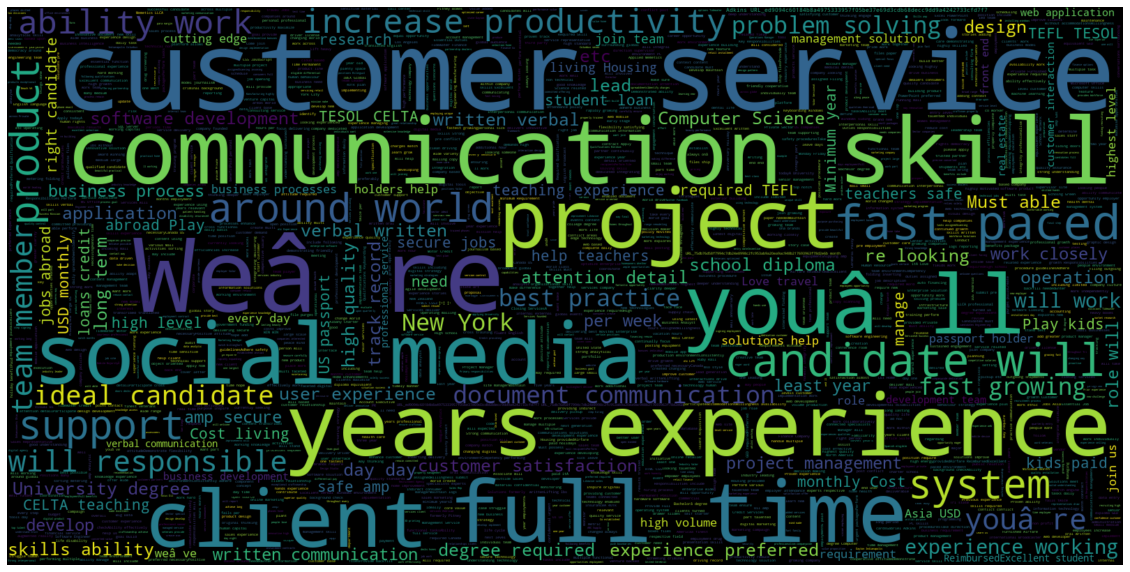

In [43]:
plt.figure(figsize = (20,20))
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = "black", stopwords=stopwords, width = 1600 , height = 800 , max_words = 3000).generate(" ".join(UniqueDataset3[UniqueDataset3.fraudulent == 0]['description']))
plt.axis("off")
plt.imshow(wc , interpolation = 'bilinear')
plt.savefig('no_fraud_cloud.jpeg')

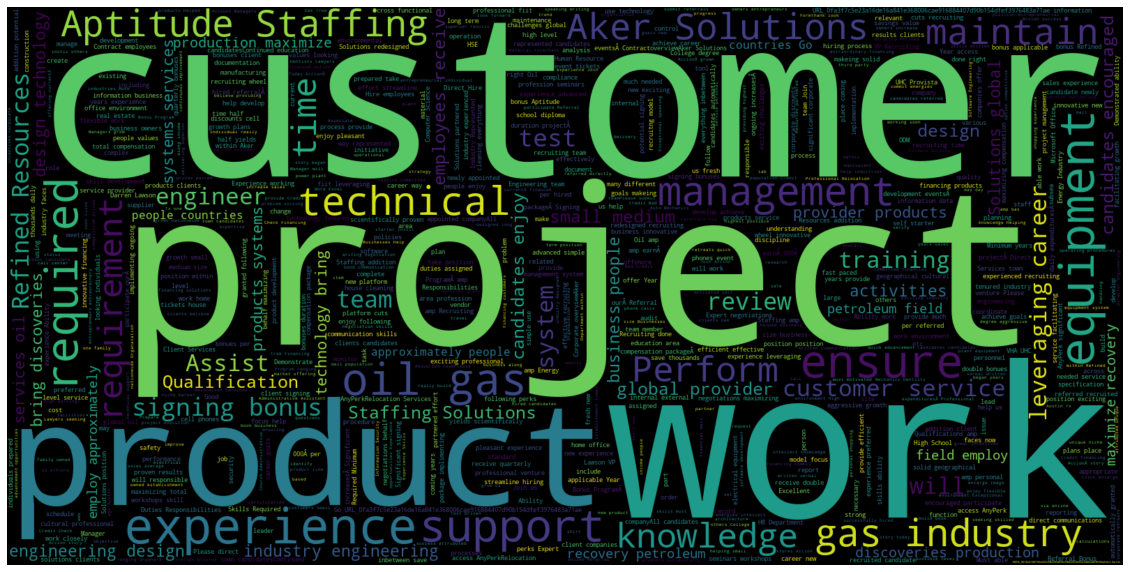

In [44]:
plt.figure(figsize = (20,20))
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="black", stopwords=stopwords, width = 1600 , height = 800 , max_words = 3000).generate(" ".join(UniqueDataset3[UniqueDataset3.fraudulent == 1]['description']))
plt.axis("off")
plt.imshow(wc , interpolation = 'bilinear')
plt.savefig('fraud_cloud.jpeg')

In [45]:
Cleaned_UniqueDataset = UniqueDataset3.copy()

In [46]:
Cleaned_UniqueDataset.head()

,title,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,city
0,$950/Week Truck Drivers Needed,Now hiring Class A truck driversAssigned Truck...,0,1,1,Full-time,Entry level,High School or equivalent,Transportation/Trucking/Railroad,Distribution,0,Houston
1,$950/week. Truck Drivers Needed,Now hiring Class A truck driversAssigned Truck...,0,1,1,Full-time,Entry level,High School or equivalent,Transportation/Trucking/Railroad,Distribution,0,Dallas
3,(Internship) Communication / E-Marketing Assis...,"Born in 2013,Â #URL_1126a42ca4e3346cc3e1a08fbb...",0,1,1,Full-time,Internship,Unspecified,Internet,Marketing,0,Brussels
4,(Internship) PR / Event Manager Assistant,"Founded at the beginning of 2013, the startup ...",0,1,1,Temporary,Internship,Unspecified,Internet,Public Relations,0,Brussels
5,(Javascript) Web Application Developer,Todaymade is on the hunt for a web developer w...,0,1,1,Full-time,Entry level,Unspecified,Program Development,Information Technology,0,Bismarck


In [47]:
#DONE CLEANING THE DATA NOW EMPLIMENTING THE LOGISTIC REGRESSION CLASSIFICATION

In [48]:
conda install -c conda-forge stopwords

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - stopwords

Current channels:

  - https://conda.anaconda.org/conda-forge/win-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [49]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
#python -m spacy download en_core_web_lg
#python -m spacy link en_core_web_lg en


In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
pd.set_option('display.max_columns', None)

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
import string






import base64
import string
import re
from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('english')


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
import string 
import re
import spacy 
#spacy.load('en_core_web_lg md')
#spacy.load('en')
from spacy.lang.en import English
parser = English()

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [53]:
Cleaned_UniqueDataset.head()

,title,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,city
0,$950/Week Truck Drivers Needed,Now hiring Class A truck driversAssigned Truck...,0,1,1,Full-time,Entry level,High School or equivalent,Transportation/Trucking/Railroad,Distribution,0,Houston
1,$950/week. Truck Drivers Needed,Now hiring Class A truck driversAssigned Truck...,0,1,1,Full-time,Entry level,High School or equivalent,Transportation/Trucking/Railroad,Distribution,0,Dallas
3,(Internship) Communication / E-Marketing Assis...,"Born in 2013,Â #URL_1126a42ca4e3346cc3e1a08fbb...",0,1,1,Full-time,Internship,Unspecified,Internet,Marketing,0,Brussels
4,(Internship) PR / Event Manager Assistant,"Founded at the beginning of 2013, the startup ...",0,1,1,Temporary,Internship,Unspecified,Internet,Public Relations,0,Brussels
5,(Javascript) Web Application Developer,Todaymade is on the hunt for a web developer w...,0,1,1,Full-time,Entry level,Unspecified,Program Development,Information Technology,0,Bismarck


In [54]:
Cleaned_UniqueDataset.isnull().sum()

title                  0
description            0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
city                   0
dtype: int64

In [55]:
Cleaned_UniqueDatasetCopy = Cleaned_UniqueDataset.copy()

In [56]:
Cleaned_UniqueDatasetCopy['fraudulent'].value_counts()

0    10174
1      241
Name: fraudulent, dtype: int64

In [57]:
conda install -c conda-forge spacy

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [58]:
import spacy
import en_core_web_sm
#nlp = spacy.load('en_core_web_lg')
stopwords = set(stopwords.words('english'))

In [59]:
punctuations = string.punctuation

In [60]:
import spacy
#import en_core_web_sm
nlp = en_core_web_sm.load()
#stopwords = stopwords.words('english')
def cleanup_text(docs, logging = False):
    #nlp = spacy.load("en_core_web_sm")
    texts = []
    counter = 1
    for doc in docs:
        if counter % 100 == 0 and logging:
            print ("Processed %d out of %d documents."%(counter, len(docs)))
        counter +=1
        #doc = nlp(doc, disable = ['parser', 'ner'])
        doc = nlp(doc, disable = ['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

In [61]:
Fraud_1 = [text for text in Cleaned_UniqueDatasetCopy[Cleaned_UniqueDatasetCopy['fraudulent'] == 1]['description']]

In [62]:
Fraud_1[10]

'We provide No Credit Check Financing to customers of Small and Medium size Businesses and can help 90% of the industries from Auto Mechanics to Dentists and Lawyers.We are seeking skilled Account Managers to grow with us and help us achieve our goals in this new and exciting industry.This is designed as a long-term position for an entrepreneurial individual to really build their book of business, along with their income.Our people enjoy a flexible work environment. High earnings with great incentives like corporate retreats and quick advancement opportunities. Experience and Skills Â\xa0Required- Minimum of 3 years of sales experience- Ability to work in a home office environment- Exceptional speaking, writing, and negotiation skills- You must be a motivated self starter and instil that others- College degree We have aggressive growth plans in place for the coming years. We provide a much needed service in facilitating the growth of small and medium size business with innovative finan

In [63]:
Fraud_0 = [text for text in Cleaned_UniqueDatasetCopy[Cleaned_UniqueDatasetCopy['fraudulent'] == 0]['description']]

In [64]:
Fraud_1_clean = cleanup_text(Fraud_1)
Fraud_1_clean = ' '.join(Fraud_1_clean).split()

In [65]:
len(Fraud_1_clean)

65237

In [66]:
Fraud_0_clean = cleanup_text(Fraud_0)
Fraud_0_clean = ' '.join(Fraud_0_clean).split()

In [67]:
len(Fraud_0_clean)

2689687

In [68]:
Fraud_1_counts = Counter(Fraud_1_clean)
Fraud_0_counts = Counter(Fraud_0_clean)

In [69]:
Fraud_1_common_words = [word[0] for word in Fraud_1_counts.most_common(20)]
Fraud_1_common_counts = [word[1] for word in Fraud_1_counts.most_common(20)]

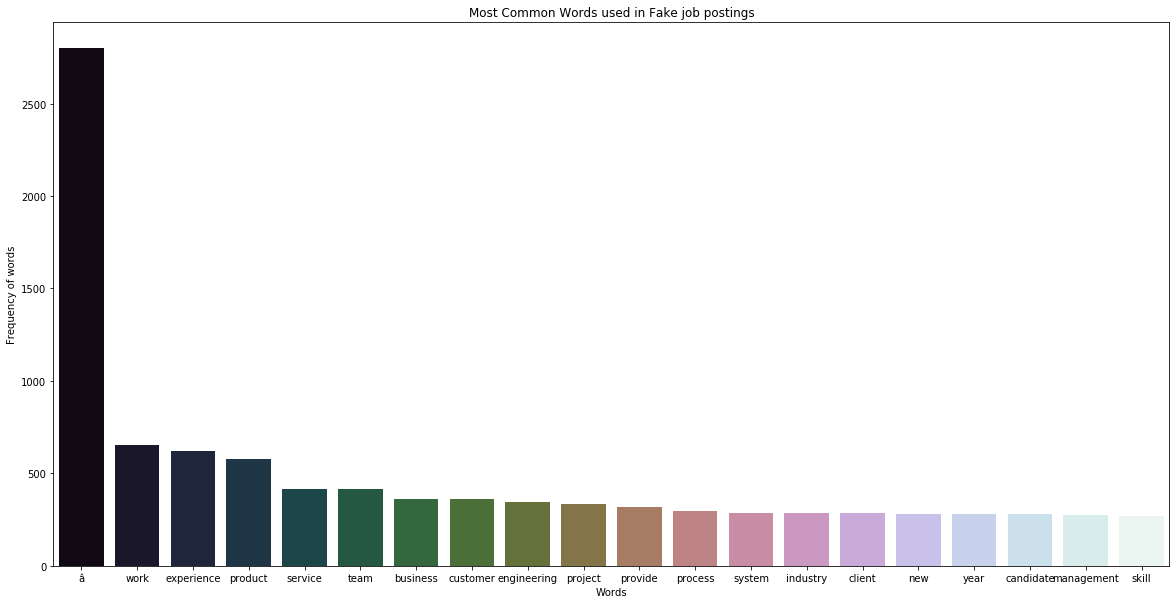

In [70]:
fig = plt.figure(figsize = (20, 10))
pal = sns.color_palette("cubehelix", 20)
sns.barplot(x = Fraud_1_common_words, y = Fraud_1_common_counts, palette=pal)
plt.title('Most Common Words used in Fake job postings')
plt.ylabel("Frequency of words")
plt.xlabel("Words")
plt.show()

In [71]:
Fraud_0_common_words = [word[0] for word in Fraud_0_counts.most_common(20)]
Fraud_0_common_counts = [word[1] for word in Fraud_0_counts.most_common(20)]

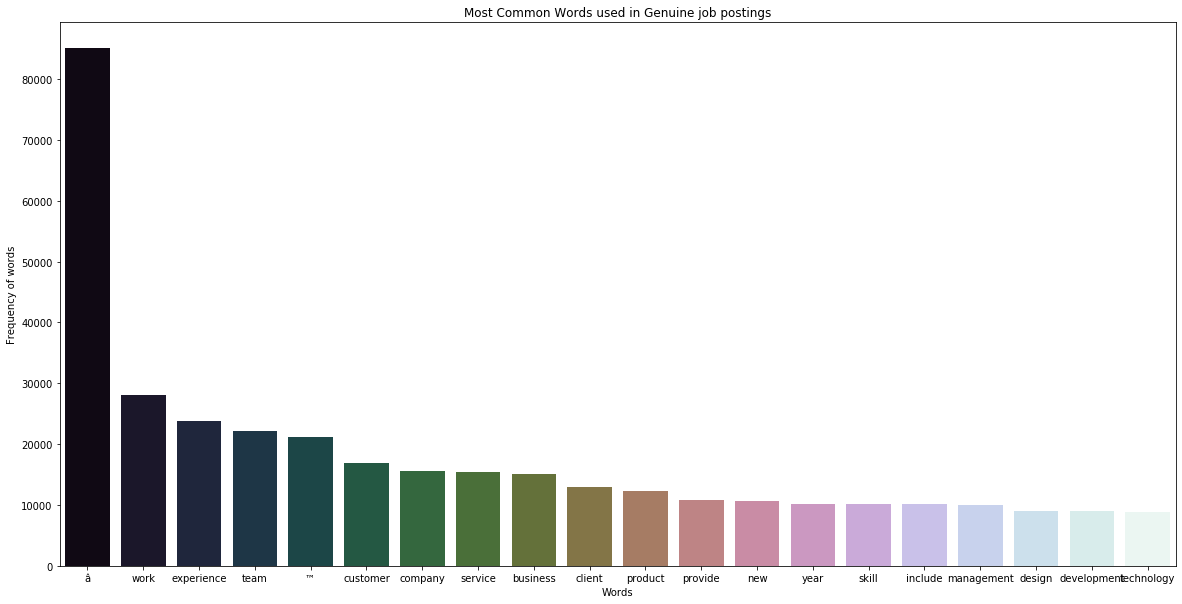

In [72]:
fig = plt.figure(figsize = (20, 10))
pal = sns.color_palette("cubehelix", 20)
sns.barplot(x = Fraud_0_common_words, y = Fraud_0_common_counts, palette=pal)
plt.title('Most Common Words used in Genuine job postings')
plt.ylabel("Frequency of words")
plt.xlabel("Words")
plt.show()

In [73]:
#FINAL DATA CLEANING

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

#import spacy
#nlp = spacy.load('en_core_web_lg')
import en_core_web_sm
nlp = en_core_web_sm.load()
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [75]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import string

STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
SYMBOLS = " ".join(string.punctuation).split(" ")

In [76]:
def tokenizetext(sample):
    text = sample.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    tokens = parser(text)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

In [77]:
vectorizer = CountVectorizer(tokenizer = tokenizetext, ngram_range = (1,3), min_df = 0.06)

In [78]:
vectorizer_features = vectorizer.fit_transform(Cleaned_UniqueDatasetCopy['description'])

In [79]:
vectorizer_features.shape

(10415, 681)

In [80]:
vectorizer_features

<10415x681 sparse matrix of type '<class 'numpy.int64'>'
	with 939027 stored elements in Compressed Sparse Row format>

In [81]:
vectorized_df = pd.DataFrame(vectorizer_features.todense(), columns = vectorizer.get_feature_names())
df_vectorized = pd.concat([Cleaned_UniqueDatasetCopy, vectorized_df], axis = 1)

In [82]:
df_vectorized.drop('description', axis = 1, inplace = True)
df_vectorized.dropna(inplace=True)

In [83]:
df_vectorized.head()

,title,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,city,,experience,tefl,tefl tesol,â,â,'s,1,10,100,2,2 years,200,200 cost,200 cost living)housing,3,3 years,30,4,5,5 years,50,6,:),ability,ability work,able,abroad,abroad :),access,account,accurate,achieve,activities,addition,additional,advanced,advertising,agency,agile,amazing,amp,amp secure,amp secure jobs,analysis,analytical,analytics,and/or,application,applications,apply,approach,appropriate,apps,area,areas,aspects,assigned,assist,attention,attitude,available,background,based,basic,believe,benefits,best,better,big,brand,brands,bring,build,building,built,business,business process,business processes,businesses,calls,campaigns,candidate,candidates,care,career,celta,celta teaching,celta teaching experience,center,challenges,change,changing,check,city,class,clean,client,clients,close,closely,cloud,code,collaborative,come,comfortable,committed,communicate,communication,communication skills,communications,community,companies,company,competitive,complete,complex,compliance,computer,computer science,consulting,consumer,consumers,contact,content,continually,continued,contract,control,core,corporate,cost,cost living)housing,costs,create,creating,creative,credit,critical,cross,culture,current,currently,customer,customer satisfaction,customer service,customers,daily,data,database,day,day day,decisions,dedicated,degree,degree required.â,degree required.â,deliver,delivering,delivers,delivery,department,design,designers,develop,developer,developers,developing,development,different,digital,diploma,direct,direction,directly,diverse,document,documentation,drive,driven,driving,drug,duties,dynamic,e,easy,edge,education,effective,effectively,efficient,email,employee,employees,employer,employment,empower,end,energy,engage,engagement,engineer,engineering,engineers,english,enhance,enjoy,ensure,ensuring,enterprise,entry,environment,environments,equipment,equivalent,essential,established,events,excel,excellent,exceptional,exciting,execute,executive,existing,experience,experience preferred,experience working,experienced,experiences,expert,expertise,experts,external,family,fast,fast growing,fast paced,features,field,finance,financial,firm,flexibility,flexible,focus,focused,follow,following,founded,friendly,fun,functional,functions,future,general,generation,global,goal,goals,good,great,group,grow,growing,growth,handle,hands,hard,health,help,help teachers,help teachers safe,helping,high,high quality,highest,highly,hire,hiring,holders,holders help,holders help teachers,home,hours,house,html,human,ideal,ideal candidate,ideas,identify,impact,implement,implementation,important,improve,include,includes,including,increase,independently,individual,individuals,industry,information,innovation,innovative,insurance,integral,integrate,integration,integrity,interactions,interested,internal,international,internet,interpersonal,issues,itâ€,javascript,job,jobs,jobs abroad,jobs abroad :),join,key,kids,kids paid,know,knowledge,language,large,largest,latest,lead,leader,leadership,leading,leads,learn,learning,level,levels,life,like,limited,line,live,living)housing,loans,loans credit,local,located,london,long,long term,look,looking,love,mail,maintain,maintaining,maintenance,major,make,making,manage,management,manager,managers,managing,market,marketing,match,maximize,media,medical,meet,meeting,meetings,member,members,microsoft,minimum,mission,mobile,model,month,monthly,monthly 200,monthly 200 cost,months,motivated,ms,multi,multiple,national,necessary,need,needed,needs,network,new,new york,non,number,offer,offering,offers,office,offices,online,open,operating,operations,opportunities,opportunity,optimize,order,organization,organizational,oriented,outside,outstanding,paced,paid,partner,partners,passion,passionate,passport,passport holders,passport holders help,people,perform,performance,performing,person,personal,phone,place,plan,planning,plans,p

In [84]:
columns_to_1_hot = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']

for column in columns_to_1_hot:
    encoded = pd.get_dummies(df_vectorized[column])
    df_vectorized = pd.concat([df_vectorized, encoded], axis = 1)
#print(df_vectorized)

In [85]:
columns_to_1_hot += ['title', 'city', 'country_name']
#print(columns_to_1_hot)
del df_vectorized['employment_type']
del df_vectorized['required_experience']
del df_vectorized['required_education']
del df_vectorized['industry']
del df_vectorized['function']
del df_vectorized['title']
del df_vectorized['city']
#del df_vectorized['country_name']

#df_vectorized.drop(columns_to_1_hot, axis = 1, inplace = True)

In [86]:
target = df_vectorized['fraudulent']
features = df_vectorized.drop('fraudulent', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.1, stratify = target, random_state=42)

In [87]:

#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neural_network import MLPClassifier

#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [88]:
from sklearn.linear_model import LogisticRegression

In [152]:
log_reg_model = LogisticRegression()
c_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
penalty_options = ['l2', 'l1']

param_grid = dict(C = c_values, penalty = penalty_options)

In [153]:
log_reg_model.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import learning_curve,GridSearchCV
grid_tfidf = GridSearchCV(log_reg_model, param_grid = param_grid, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose=1)

In [91]:
grid_tfidf.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.1min finished
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l2', 'l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [142]:
#log_reg_pred
predictions = grid_tfidf.predict(X_test)

In [143]:
#classification_report(y_test,log_reg_pred)

In [144]:
grid_tfidf.best_score_

0.7529213227746387

In [145]:
grid_tfidf.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [146]:
#predictions = grid_tfidf.predict(X_test)

In [147]:
roc_auc_score(y_test, predictions)

0.5340559109215826

In [148]:
confusion_matrix(y_test,predictions)

array([[601,   2],
       [ 13,   1]], dtype=int64)

In [149]:
from sklearn.metrics import accuracy_score

In [150]:
accuracy_score(y_test,predictions)

0.9756888168557536

In [151]:
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       603
         1.0       0.33      0.07      0.12        14

    accuracy                           0.98       617
   macro avg       0.66      0.53      0.55       617
weighted avg       0.96      0.98      0.97       617

